In [55]:
import BSE
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random
import pprint

from BSE import market_session

# Constants

In [40]:
""" 600 seconds, each trading period lasts 40 seconds (600 / 15 = 40)
"""
START_TIME     = 0
END_TIME       = 10 * 60
ORDER_INTERVAL = 15

# Offset Functions

## Drunkard's Walk

In [63]:
def offset_drunkards_walk(time):
    # TODO
    return

## Sine Wave

In [64]:
def offset_sine(time):
    # TODO
    return

# Supply and Demand Schedules

## Static Supply and Demand

In [41]:
sup_range = (50, 150)
dem_range = (50, 150)

### Fixed Stepmode

Orders are spaced out equally, producing supply-demand curves with fixed step size.

In [51]:
fixed_supply_schedule = [{
    'from': start_time, 'to': end_time,
    'ranges': [sup_range],
    'stepmode': 'fixed'
}]

fixed_demand_schedule = [{
    'from': start_time, 'to': end_time,
    'ranges': [dem_range],
    'stepmode': 'fixed'
}]

# All traders are given a new order periodically at the same time,
# at the beginning of every interval.
fixed_periodic_order_schedule = {
    'sup'     : fixed_supply_schedule,
    'dem'     : fixed_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'periodic'
}

# Orders are given to traders one at a time at fixed intervals.
fixed_drip_fixed_order_schedule = {
    'sup'     : fixed_supply_schedule,
    'dem'     : fixed_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-fixed'
}

# Similar to 'drip-fixed', but intervals are not fixed due to 
# added random noise.
fixed_drip_jitter_order_schedule = {
    'sup'     : fixed_supply_schedule,
    'dem'     : fixed_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-jitter'
}

# New order arrive at intervals modelled with a Poisson distribution.
fixed_drip_poisson_order_schedule = {
    'sup'     : fixed_supply_schedule,
    'dem'     : fixed_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-poisson'
}

""" All order schedules with the different types of re-supply schedules,
    using the fixed stepmode for spacing out orders.
"""
fixed_order_schedules = {
    'periodic'     : fixed_periodic_order_schedule,
    'drip-fixed'   : fixed_drip_fixed_order_schedule,
    'drip-jitter'  : fixed_drip_jitter_order_schedule,
    'drip-poisosn' : fixed_drip_poisson_order_schedule
}

### Jittered Stepmode

Fixed stepmode, with random adjustments for each order, allowing each to deviate by *at most* half a step upwards or downards, simulating random noise.

In [52]:
jittered_supply_schedule = [{
    'from': start_time, 'to': end_time,
    'ranges': [sup_range],
    'stepmode': 'jittered'
}]

jittered_demand_schedule = [{
    'from': start_time, 'to': end_time,
    'ranges': [dem_range],
    'stepmode': 'jittered'
}]

# All traders are given a new order periodically at the same time,
# at the beginning of every interval.
jittered_periodic_order_schedule = {
    'sup'     : jittered_supply_schedule,
    'dem'     : jittered_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'periodic'
}

# Orders are given to traders one at a time at fixed intervals.
jittered_drip_fixed_order_schedule = {
    'sup'     : jittered_supply_schedule,
    'dem'     : jittered_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-fixed'
}

# Similar to 'drip-fixed', but intervals are not fixed due to 
# added random noise.
jittered_drip_jitter_order_schedule = {
    'sup'     : jittered_supply_schedule,
    'dem'     : jittered_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-jitter'
}

# New order arrive at intervals modelled with a Poisson distribution.
jittered_drip_poisson_order_schedule = {
    'sup'     : jittered_supply_schedule,
    'dem'     : jittered_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-poisson'
}

""" All order schedules with the different types of re-supply schedules,
    using the jittered stepmode for spacing out orders.
"""
jittered_order_schedules = {
    'periodic'     : jittered_periodic_order_schedule,
    'drip-fixed'   : jittered_drip_fixed_order_schedule,
    'drip-jitter'  : jittered_drip_jitter_order_schedule,
    'drip-poisosn' : jittered_drip_poisson_order_schedule
}

### Random Stepmode

Assigns each trader an order which is set at random within specified range.

In [53]:
random_supply_schedule = [{
    'from': start_time, 'to': end_time,
    'ranges': [sup_range],
    'stepmode': 'random'
}]

random_demand_schedule = [{
    'from': start_time, 'to': end_time,
    'ranges': [dem_range],
    'stepmode': 'random'
}]

# All traders are given a new order periodically at the same time,
# at the beginning of every interval.
random_periodic_order_schedule = {
    'sup'     : random_supply_schedule,
    'dem'     : random_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'periodic'
}

# Orders are given to traders one at a time at fixed intervals.
random_drip_fixed_order_schedule = {
    'sup'     : random_supply_schedule,
    'dem'     : random_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-fixed'
}

# Similar to 'drip-fixed', but intervals are not fixed due to 
# added random noise.
random_drip_jitter_order_schedule = {
    'sup'     : random_supply_schedule,
    'dem'     : random_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-jitter'
}

# New order arrive at intervals modelled with a Poisson distribution.
random_drip_poisson_order_schedule = {
    'sup'     : random_supply_schedule,
    'dem'     : random_demand_schedule,
    'interval': ORDER_INTERVAL,
    'timemode': 'drip-poisson'
}

""" All order schedules with the different types of re-supply schedules,
    using the random stepmode for spacing out orders.
"""
random_order_schedules = {
    'periodic'     : random_periodic_order_schedule,
    'drip-fixed'   : random_drip_fixed_order_schedule,
    'drip-jitter'  : random_drip_jitter_order_schedule,
    'drip-poisosn' : random_drip_poisson_order_schedule
}

**Example use:**

`<stepmode>_order_schedules['timemode']`

`stepmode`:
- fixed
- jittered
- random

`timemode`:
- periodic
- drip-fixed
- drip-jitter
- drip-poisson

In [61]:
# Order schedule that uses a fixed stepmode for spacing out orders within
# our supply and demand range, with a periodic timemode.
print("Fixed spacing and periodic redistribution: \n")
pprint.pprint(fixed_order_schedules['periodic'])
print()

# Uses a jittered stepmode for spacing out orders within our supply and
# demand range, with drip-fixed timemode.
print("Jittered spacing and drip-fixed redistribution: \n")
pprint.pprint(jittered_order_schedules['drip-fixed'])
print()

# Random stepmode for spacing our orders, with drip-jitter timemode for
# re-distribution of orders to traders.
print("Random spacing and drip-jitter redistribution: \n")
pprint.pprint(random_order_schedules['drip-jitter'])

Fixed spacing and periodic redistribution: 

{'dem': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'fixed', 'to': 600}],
 'interval': 15,
 'sup': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'fixed', 'to': 600}],
 'timemode': 'periodic'}

Jittered spacing and drip-fixed redistribution: 

{'dem': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'jittered', 'to': 600}],
 'interval': 15,
 'sup': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'jittered', 'to': 600}],
 'timemode': 'drip-fixed'}

Random spacing and drip-jitter redistribution: 

{'dem': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'random', 'to': 600}],
 'interval': 15,
 'sup': [{'from': 0, 'ranges': [(50, 150)], 'stepmode': 'random', 'to': 600}],
 'timemode': 'drip-jitter'}


## Dynamic Supply and Demand

### Drunken Walk

### Market Shock

### Market Shock and Drunken Walk

# Sellers and Buyers

In [ ]:
# TODO

# Experimentation

In [ ]:
# TODO

# Helper Functions

In [12]:
# Use this to plot trades of a single experiment
def plot_trades(trial_id):
    prices_fname = trial_id + '_tape.csv'
    x = np.empty(0)
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

    plt.plot(x, y, 'x', color='black') 

In [13]:
# Use this to run an experiment n times and plot all trades
def n_runs_plot_trades(n, trial_id, start_time, end_time, traders_spec, order_sched):
    x = np.empty(0)
    y = np.empty(0)

    for i in range(n):
        trialId = trial_id + '_' + str(i)
        tdump = open(trialId + '_avg_balance.csv','w')

        market_session(trialId, start_time, end_time, traders_spec, order_sched, tdump, True, False)
        
        tdump.close()

        with open(trialId + '_tape.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                time = float(row[1])
                price = float(row[2])
                x = np.append(x,time)
                y = np.append(y,price)

    plt.plot(x, y, 'x', color='black');

In [14]:
# !!! Don't use on it's own   
def getorderprice(i, sched, n, mode):
    pmin = min(sched[0][0], sched[0][1])
    pmax = max(sched[0][0], sched[0][1])
    prange = pmax - pmin
    stepsize = prange / (n - 1)
    halfstep = round(stepsize / 2.0)

    if mode == 'fixed':
        orderprice = pmin + int(i * stepsize)
    elif mode == 'jittered':
        orderprice = pmin + int(i * stepsize) + random.randint(-halfstep, halfstep)
    elif mode == 'random':
        if len(sched) > 1:
            # more than one schedule: choose one equiprobably
            s = random.randint(0, len(sched) - 1)
            pmin = min(sched[s][0], sched[s][1])
            pmax = max(sched[s][0], sched[s][1])
        orderprice = random.randint(pmin, pmax)
    return orderprice

In [15]:
# !!! Don't use on it's own
def make_supply_demand_plot(bids, asks):
    # total volume up to current order
    volS = 0
    volB = 0

    fig, ax = plt.subplots()
    plt.ylabel('Price')
    plt.xlabel('Quantity')
    
    pr = 0
    for b in bids:
        if pr != 0:
            # vertical line
            ax.plot([volB,volB], [pr,b], 'r-')
        # horizontal lines
        line, = ax.plot([volB,volB+1], [b,b], 'r-')
        volB += 1
        pr = b
    if bids:
        line.set_label('Demand')
        
    pr = 0
    for s in asks:
        if pr != 0:
            # vertical line
            ax.plot([volS,volS], [pr,s], 'b-')
        # horizontal lines
        line, = ax.plot([volS,volS+1], [s,s], 'b-')
        volS += 1
        pr = s
    if asks:
        line.set_label('Supply')
        
    if bids or asks:
        plt.legend()
    plt.show()

In [16]:
# Use this to plot supply and demand curves from supply and demand ranges and stepmode
def plot_sup_dem(seller_num, sup_ranges, buyer_num, dem_ranges, stepmode):
    asks = []
    for s in range(seller_num):
        asks.append(getorderprice(s, sup_ranges, seller_num, stepmode))
    asks.sort()
    bids = []
    for b in range(buyer_num):
        bids.append(getorderprice(b, dem_ranges, buyer_num, stepmode))
    bids.sort()
    bids.reverse()
    
    make_supply_demand_plot(bids, asks) 

In [17]:
# Plot sorted trades, useful is some situations
def in_order_plot(trial_id):
    prices_fname = trial_id + '_tape.csv'
    y = np.empty(0)
    with open(prices_fname, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            price = float(row[2])
            y = np.append(y,price)
    y = np.sort(y)
    x = list(range(len(y)))

    plt.plot(x, y, 'x', color='black') 

In [18]:
# Plot offset function
def plot_offset_fn(offset_fn, total_time_seconds):   
    x = list(range(total_time_seconds))
    offsets = []
    for i in range(total_time_seconds):
        offsets.append(offset_fn(i))
    plt.plot(x, offsets, 'x', color='black')  

# Jupyter Themes

In [77]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [82]:
!jt -t grade3

# BSE Code Exploration

In [20]:
sellers_spec = [('PRDE', 10, {'k': 4, 's_min': -1, 's_max': +1})]
buyers_spec  = sellers_spec
traders_spec = {'sellers': sellers_spec, 'buyers': buyers_spec}

In [23]:
start_time     = 0
end_time       = 10 * 60
order_interval = 15

In [24]:
sup_ranges = (50, 150)
dem_ranges = sup_ranges

supply_schedule = [{
    'from': start_time, 'to': end_time,
    'ranges': [sup_ranges],
    'stepmode': 'fixed'
}]

demand_schedule = [{
    'from': start_time, 'to': end_time,
    'ranges': [dem_ranges],
    'stepmode': 'fixed'
}]

In [26]:
order_schedule = {
    'sup': supply_schedule,
    'dem': demand_schedule,
    'interval': order_interval,
    'timemode': 'periodic'
}

In [29]:
trial_id   = 'test_1'
trial_dump = open('./tests_1/test_1_avg_balance.csv', 'w')
dump_all   = True
verbose    = False

market_session(
    trial_id,
    start_time,
    end_time,
    traders_spec,
    order_schedule,
    trial_dump,
    dump_all,
    verbose
)

trial_dump.close()

B00: PRDE active_strat=[0]:
[0]: s=+0.264155, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.450464, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.302153, start=0.000000, $=0.000000, pps=0.000000
[3]: s=-0.922289, start=0.000000, $=0.000000, pps=0.000000


B01: PRDE active_strat=[0]:
[0]: s=+0.746629, start=0.000000, $=0.000000, pps=0.000000
[1]: s=+0.178832, start=0.000000, $=0.000000, pps=0.000000
[2]: s=-0.416999, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.080370, start=0.000000, $=0.000000, pps=0.000000


B02: PRDE active_strat=[0]:
[0]: s=-0.232712, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.328170, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.858468, start=0.000000, $=0.000000, pps=0.000000
[3]: s=+0.365712, start=0.000000, $=0.000000, pps=0.000000


B03: PRDE active_strat=[0]:
[0]: s=-0.841265, start=0.000000, $=0.000000, pps=0.000000
[1]: s=-0.292196, start=0.000000, $=0.000000, pps=0.000000
[2]: s=+0.238526, start=0.000000, $=0.000000, pps=0.0000

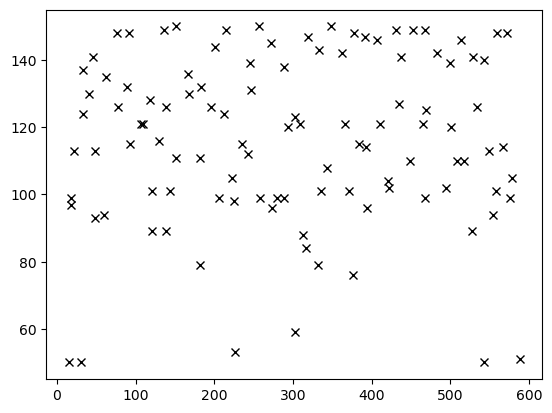

In [31]:
plot_trades('test_1')

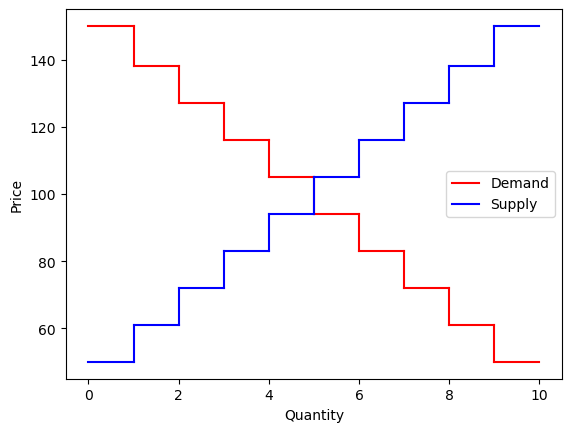

In [33]:
plot_sup_dem(10, [sup_ranges], 10, [dem_ranges], 'fixed')